# TASK 1: IMPORT LIBRARIES AND DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_admission = pd.read_csv("Admission_Predict.csv")

In [3]:
df_admission.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Let's drop the serial no.

In [4]:
df_admission.drop("Serial No.", axis = 1, inplace = True)

# TASK 2: PERFORM EXPLORATORY DATA ANALYSIS

checking the null values

In [5]:
df_admission.isnull()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [6]:
df_admission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB


In [7]:
df_admission.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


Grouping by University Rating 

In [8]:
df_university_rating = df_admission.groupby("University Rating").mean()
df_university_rating

,GRE Score,TOEFL Score,SOP,LOR,CGPA,Research,Chance of Admit
University Rating,,,,,,,
1,304.911765,100.205882,1.941176,2.426471,7.798529,0.294118,0.562059
2,309.134921,103.444444,2.682540,2.956349,8.177778,0.293651,0.626111
3,315.030864,106.314815,3.308642,3.401235,8.500123,0.537037,0.702901
4,323.304762,110.961905,4.000000,3.947619,8.936667,0.780952,0.801619
5,327.890411,113.438356,4.479452,4.404110,9.278082,0.876712,0.888082


# TASK 3: PERFORM DATA VISUALIZATION

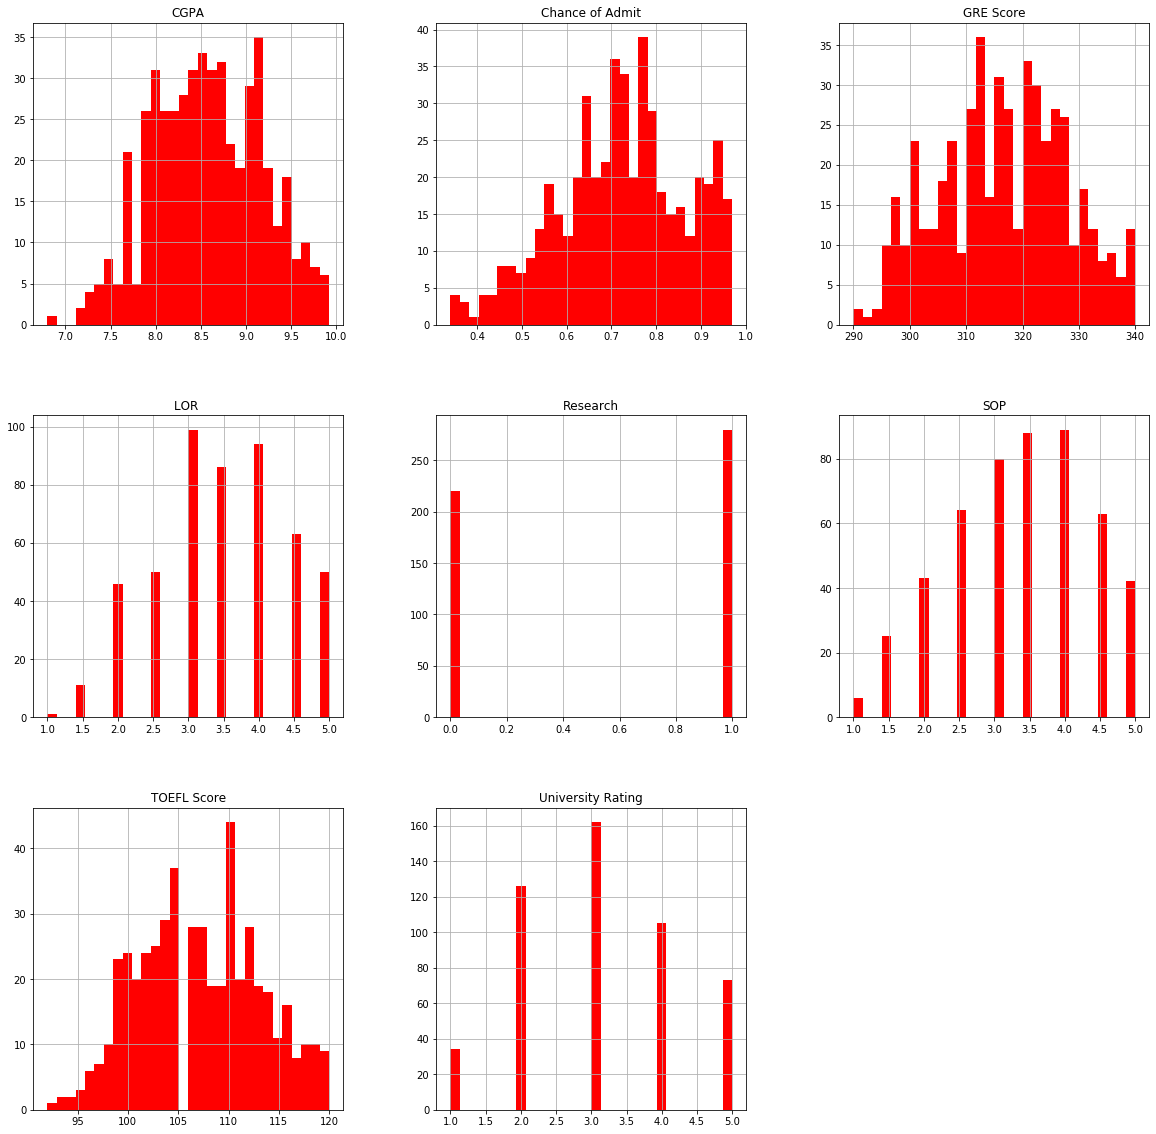

In [9]:
df_admission.hist(bins = 30, figsize = (20, 20), color = "r")
plt.show()

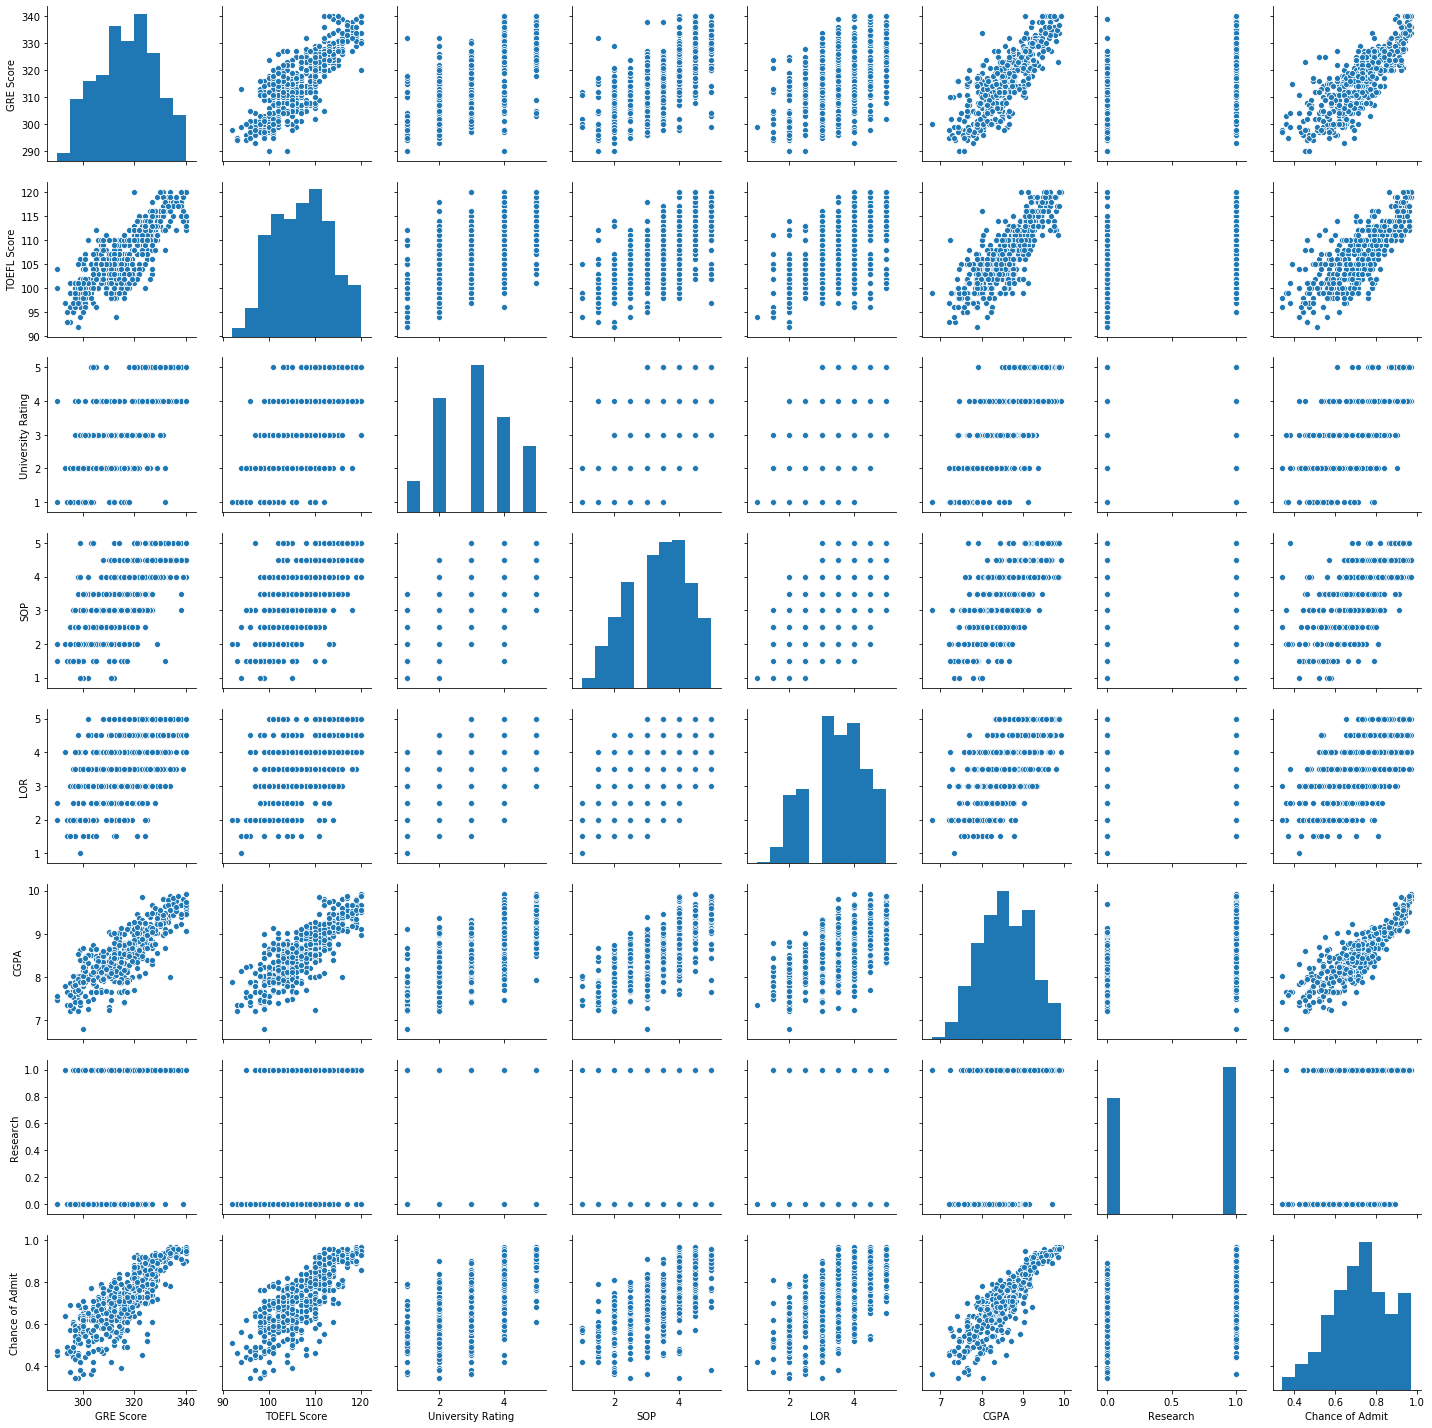

In [10]:
sns.pairplot(df_admission)
plt.show()

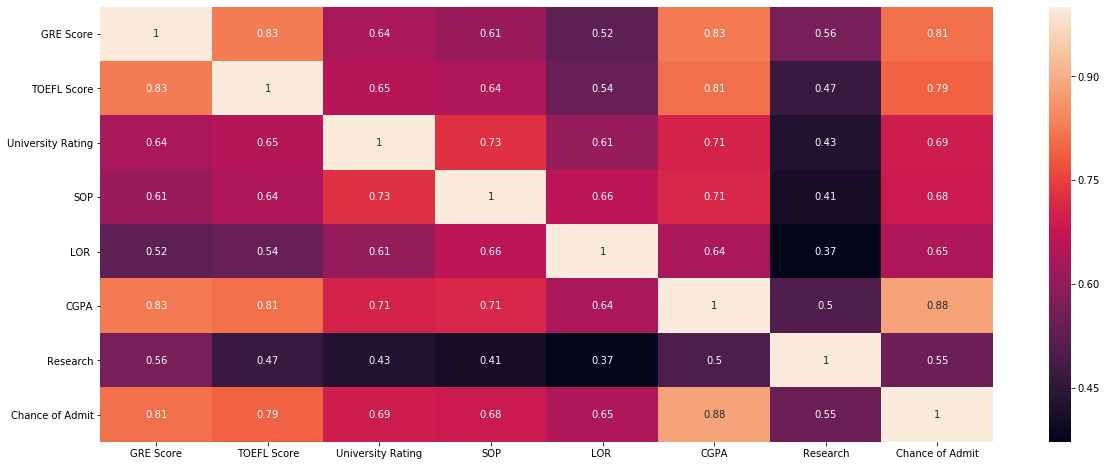

In [11]:
corr_matrix = df_admission.corr()
plt.figure(figsize = (20, 8))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# TASK 4: CREATE TRAINING AND TESTING DATASET

In [12]:
df_admission.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [13]:
X = df_admission.drop("Chance of Admit", axis = 1)

In [14]:
y = df_admission["Chance of Admit"]

In [15]:
X.shape

(500, 7)

In [16]:
y.shape

(500,)

In [17]:
X = np.array(X)
y = np.array(y)

In [18]:
y = y.reshape(-1, 1)
y.shape

(500, 1)

Scaling the data before training the model

In [19]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)

In [20]:
scaler_y = StandardScaler()
y = scaler_x.fit_transform(y)

Spliting the data in to test and train sets

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)

# TASK 5: TRAIN AND EVALUATE A LINEAR REGRESSION MODEL

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

In [23]:
LinearRegression_model = LinearRegression()
LinearRegression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
accuracy_LinearRegression = LinearRegression_model.score(X_test, y_test)
accuracy_LinearRegression

0.8213768463774025

# TASK 6: TRAIN AND EVALUATE AN ARTIFICIAL NEURAL NETWORK

In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam

In [26]:
ANN_model = keras.Sequential()
ANN_model.add(Dense(50, input_dim = 7))
ANN_model.add(Activation("relu"))
ANN_model.add(Dense(150))
ANN_model.add(Activation("relu"))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(150))
ANN_model.add(Activation("relu"))
ANN_model.add(Dropout(0.5))
ANN_model.add(Dense(50))
ANN_model.add(Activation("linear"))
ANN_model.add(Dense(1))
ANN_model.compile(loss = "mse", optimizer = "adam")
ANN_model.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                400       
_________________________________________________________________
activation (Activation)      (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_1 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout (Dropout)            (None, 150)               0         
_______________________________________

In [27]:
ANN_model.compile(optimizer = "Adam", loss = "mean_squared_error")

In [28]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs = 100, batch_size = 20, validation_split = 0.2)

Train on 340 samples, validate on 85 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/100
340/340 [==============================] - 1s 2ms/sample - loss: 0.5515 - val_loss: 0.2389
Epoch 2/100
340/340 [==============================] - 0s 399us/sample - loss: 0.3696 - val_loss: 0.2463
Epoch 3/100
340/340 [==============================] - 0s 327us/sample - loss: 0.3117 - val_loss: 0.2517
Epoch 4/100
340/340 [==============================] - 0s 315us/sample - loss: 0.3086 - val_loss: 0.2418
Epoch 5/100
340/340 [==============================] - 0s 325us/sample - loss: 0.2820 - val_loss: 0.2401
Epoch 6/100
340/340 [==============================] - 0s 481us/sample - loss: 0.2351 - val_loss: 0.2278
Epoch 7/100
340/340 [==============================] - 0s 308us/sample - loss: 0.2419 - val_loss: 0.2168
Epoch 8/100
340/340 [==============================] - 0s 327us/sample - loss: 0.2457 - val_loss: 0.2526
Epoch 9/100
340/340 [==============================] - 0s 315us/sampl

In [29]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy : {}".format(accuracy_ANN))

75/75 [==============================] - 0s 90us/sample - loss: 0.3057
Accuracy : 0.6943431389331818


In [30]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

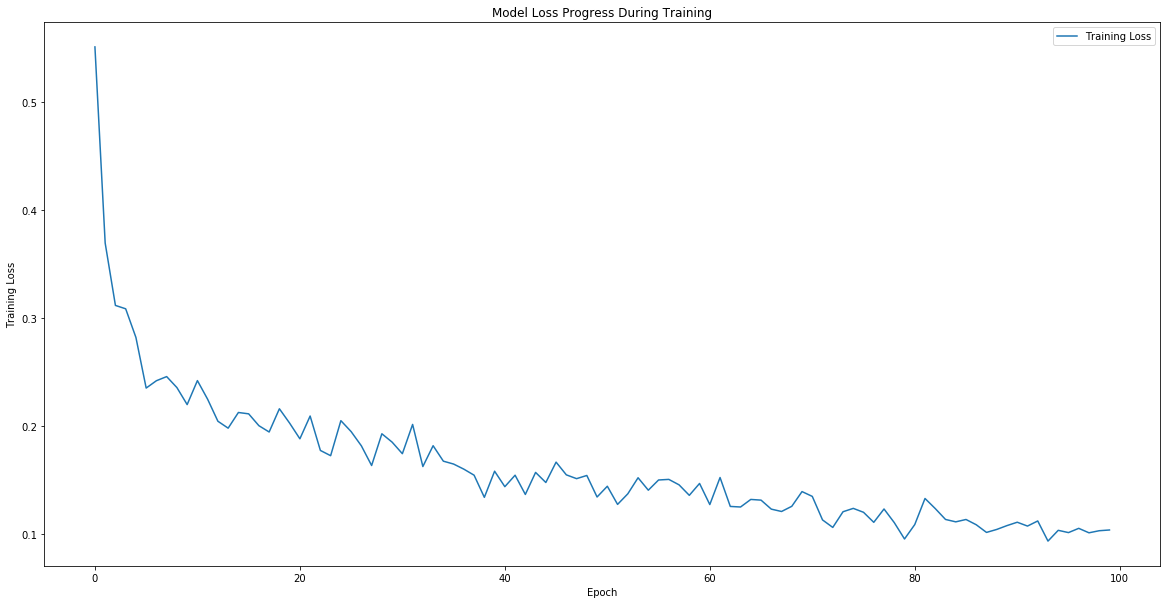

In [31]:
plt.figure(figsize = (20, 10))
plt.plot(epochs_hist.history["loss"])
plt.title("Model Loss Progress During Training")
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.legend(["Training Loss"])
plt.show()

# TASK 7: TRAIN AND EVALUATE A DECISION TREE AND RANDOM FOREST MODELS

Decision tree builds regression or classification models in the form of a tree structure. 
Decision tree breaks down a dataset into smaller subsets while at the same time an associated decision tree is incrementally developed. 
The final result is a tree with decision nodes and leaf nodes.

In [32]:
from sklearn.tree import DecisionTreeRegressor
DecisionTree_model = DecisionTreeRegressor()
DecisionTree_model.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [33]:
accuracy_DecisionTree = DecisionTree_model.score(X_test, y_test)
accuracy_DecisionTree

0.6206917938492921

Many decision Trees make up a random forest model which is an ensemble model. 
Predictions made by each decision tree are averaged to get the prediction of random forest model.
A random forest regressor fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [34]:
from sklearn.ensemble import RandomForestRegressor
RandomForest_model = RandomForestRegressor(n_estimators = 100, max_depth = 10)
RandomForest_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [35]:
accuracy_RandomForest = RandomForest_model.score(X_test, y_test)
accuracy_RandomForest

0.7996469037033596

# TASK 8: CALCULATE REGRESSION MODEL KPIs

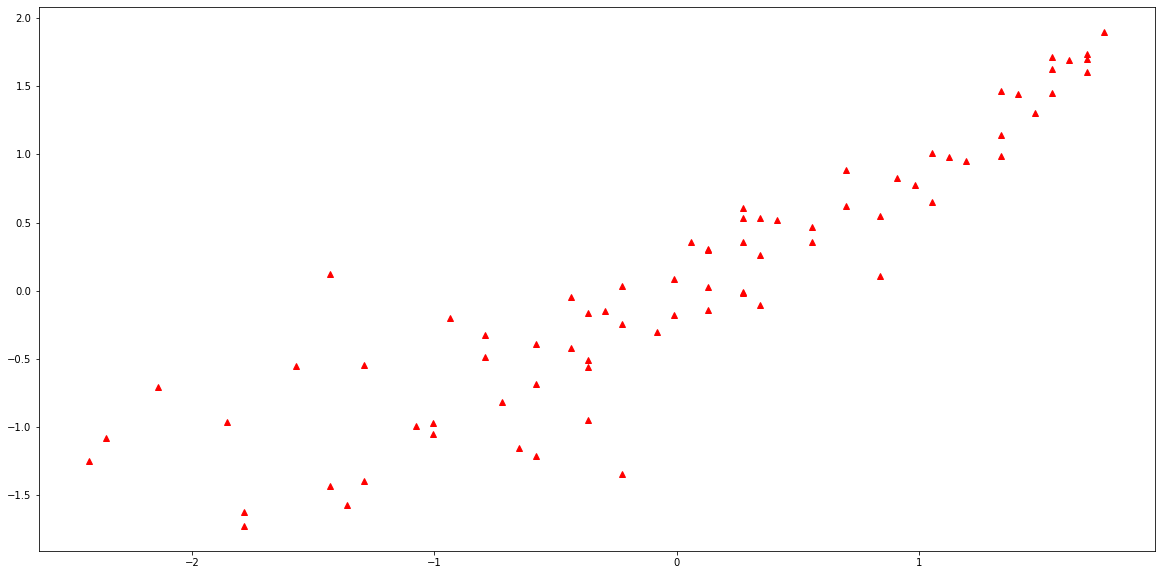

In [36]:
plt.figure(figsize = (20, 10))
y_predict = LinearRegression_model.predict(X_test)
plt.plot(y_test, y_predict, "^", color = "r")
plt.show()

In [37]:
y_predict_original1 = scaler_y.fit_transform(y_predict)
y_test_original1 = scaler_y.fit_transform(y_test)

In [38]:
y_predict_original = scaler_y.inverse_transform(y_predict_original1)
y_test_original = scaler_y.inverse_transform(y_test_original1)

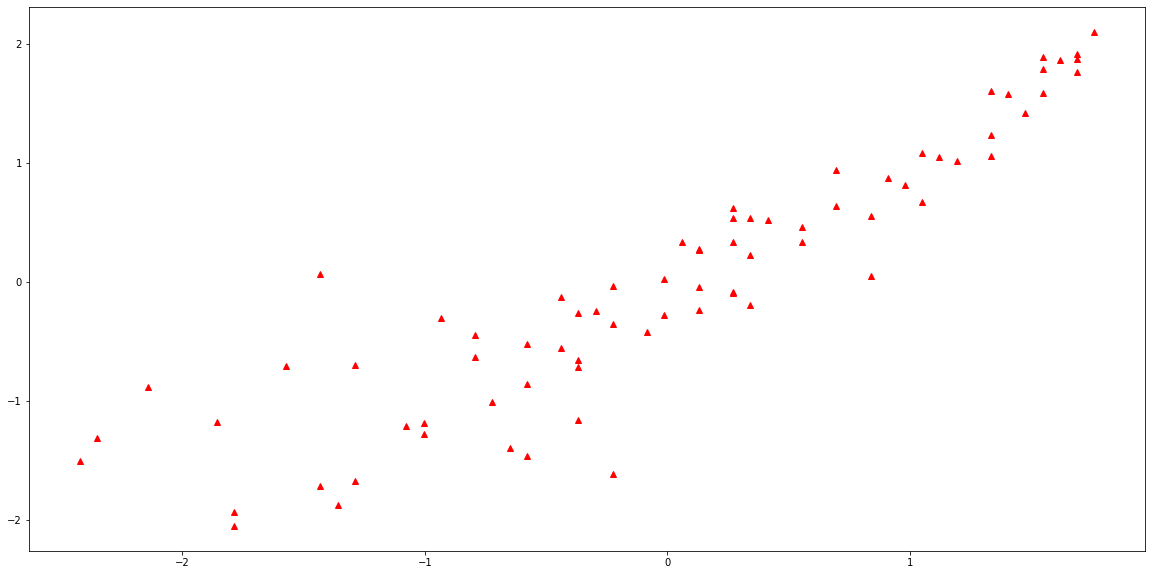

In [39]:
plt.figure(figsize=(20, 10))
plt.plot(y_test_original, y_predict_original, "^", color = "r")
plt.show()

In [40]:
k = X_test.shape[1]
n = len(X_test)
n

75

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_original, y_predict_original)),".3f"))
MSE = mean_squared_error(y_test_original, y_predict_original)
MAE = mean_absolute_error(y_test_original, y_predict_original)
r2 = r2_score(y_test_original, y_predict_original)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print("RMSE =", RMSE, "\nMSE =", MSE, "\nMAE =", MAE, "\nR2 =", r2, "\nAdjusted R2 =", adj_r2) 

RMSE = 0.461 
MSE = 0.21295089052901162 
MAE = 0.33882897338781265 
R2 = 0.8176551953314685 
Adjusted R2 = 0.7986042455899801
